# **INTRODUCTION**

---

In this report we dive into the neaty greeties of data exploration  analysis. Using a dataset on Weather patterns that were recorded over a duration of time, we aim to understand each and every stage that goes into demistify the data exploration process.

The dataset consists of weather data with several key attributes. Here’s a brief overview of the columns:

* **Date/Time**: This column contains timestamps, representing the date and time of the recorded weather data.
* **Temp_C**: This column represents the temperature in degrees Celsius.

* **Dew Point Temp_C**: This indicates the dew point temperature in degrees Celsius.
* **Rel Hum_%**: This shows the relative humidity as a percentage.
* **Wind Speed_km/h**: This column contains the wind speed in kilometers per hour.
* **Visibility_km:** This represents the visibility in kilometers.
* **Press_kPa**: This indicates the atmospheric pressure in kilopascals.
Weather: This column provides a description of the weather conditions.

# **Data Overview and Cleaning:**

In this section we aim to:
* view the key characteristics of the dataset.
* Identify and handle any missing or null values.
* Check for and address any duplicate records.



We first make the necessary imports of the libraries to be used.

In [109]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We then load on the dataset into the notebook

In [110]:
df = pd.read_csv("/content/weather_data.csv")
# View the first few rows of the dataset
df.head(10)

,Date/Time,Temp_C,Dew Point,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


View basic information about the dataset (number of rows, columns, data types, etc.)

In [111]:
df.shape

(8784, 8)

In [112]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        8784 non-null   object 
 1   Temp_C           8784 non-null   float64
 2   Dew Point        8784 non-null   float64
 3   Rel Hum_%        8784 non-null   int64  
 4   Wind Speed_km/h  8784 non-null   int64  
 5   Visibility_km    8784 non-null   float64
 6   Press_kPa        8784 non-null   float64
 7   Weather          8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [114]:
df.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


For this dataset, We would like to see the different count of weather descriptions

In [115]:
df['Weather'].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


Check for missing or null values for each column

In [116]:
df.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


If there were any nulls, we would drop them using the df.dropna() method

Check for duplicate records within the dataset

In [117]:
df.duplicated().sum()

0

Optionally we would rop duplicate records using df.drop_duplicates(keep='last', inplace=True)

Similarly we would check if there is indeed duplicated records(times with with same weather) within the Weather Field of the Dataset

In [118]:
df['Weather'].duplicated().sum()

8734

To show the number of unique Weather descriptions

In [119]:
df['Weather'].nunique()

50

# **Statistical Summary:**

In this section we aim to:
* Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
* Identify and describe any significant outliers in the data.


Check on summary statistics for all columns within the weather dataset

In [120]:
df.describe(include='all')

,Date/Time,Temp_C,Dew Point,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [121]:
df['Rel Hum_%'].mode()[0]

68

To get a more filtered statistical summary for the numerical columns we can filter them out and look for the measures of central tendencies

In [122]:
df_num_filtered = df.select_dtypes(include=[np.number])
df_num_filtered.describe()

,Temp_C,Dew Point,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Standard Deviation for each numerical feature

In [123]:
print("\nStandard Deviation:")
std_devs = df_num_filtered.std()
print(std_devs)


Standard Deviation:
Temp_C             11.687883
Dew Point          10.883072
Rel Hum_%          16.918881
Wind Speed_km/h     8.688696
Visibility_km      12.622688
Press_kPa           0.844005
dtype: float64


## **OutLiers**

Detecting Outliers using the IQR Method

1.  Calculate the Interquartile Range (IQR) for each numerical **feature**

In [124]:
Q1 =df_num_filtered.quantile(0.25)
Q3 =df_num_filtered.quantile(0.75)
IQR = Q3 - Q1

2. Define outliers as values outside 1.5 * IQR above Q3 or below Q1

In [125]:
outliers = ((df_num_filtered < (Q1 - 1.5 * IQR)) | (df_num_filtered > (Q3 + 1.5 * IQR)))

In [126]:
# Print the number of outliers in each column
outlier_count = outliers.sum()
print("Number of outliers in each column:")
print(outlier_count)

# Optionally, display rows containing outliers
# outlier_rows = df_num_filtered[outliers.any(axis=1)]
# print("\nRows with significant outliers:")
# print(outlier_rows)

Number of outliers in each column:
Temp_C                0
Dew Point             0
Rel Hum_%             2
Wind Speed_km/h     162
Visibility_km      3539
Press_kPa           207
dtype: int64


In [127]:
# Print specific outliers for each numerical column
for column in df_num_filtered.columns:
    print(f"\nOutliers in '{column}':")
    outlier_values = df_num_filtered[column][outliers[column]]
    print(outlier_values)

    if outlier_values.empty:
        print("No outliers found.")


Outliers in 'Temp_C':
Series([], Name: Temp_C, dtype: float64)
No outliers found.

Outliers in 'Dew Point':
Series([], Name: Dew Point, dtype: float64)
No outliers found.

Outliers in 'Rel Hum_%':
1984    18
3066    18
Name: Rel Hum_%, dtype: int64

Outliers in 'Wind Speed_km/h':
25      39
32      39
33      44
34      43
36      48
        ..
8679    37
8680    37
8684    37
8749    37
8750    37
Name: Wind Speed_km/h, Length: 162, dtype: int64

Outliers in 'Visibility_km':
0        8.0
1        8.0
2        4.0
3        4.0
4        4.8
        ... 
8779     9.7
8780     9.7
8781     4.8
8782     9.7
8783    11.3
Name: Visibility_km, Length: 3539, dtype: float64

Outliers in 'Press_kPa':
294     98.94
295     98.84
296     98.69
297     98.56
298     98.44
        ...  
8553    98.58
8554    98.70
8555    98.78
8556    98.86
8557    98.96
Name: Press_kPa, Length: 207, dtype: float64


# **Data Visualization**

In this section we aim to:
* Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
* Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
* Create correlation matrices and heatmaps to identify relationships between different weather parameters.

**Univariate Analysis**

Temperature Distribution

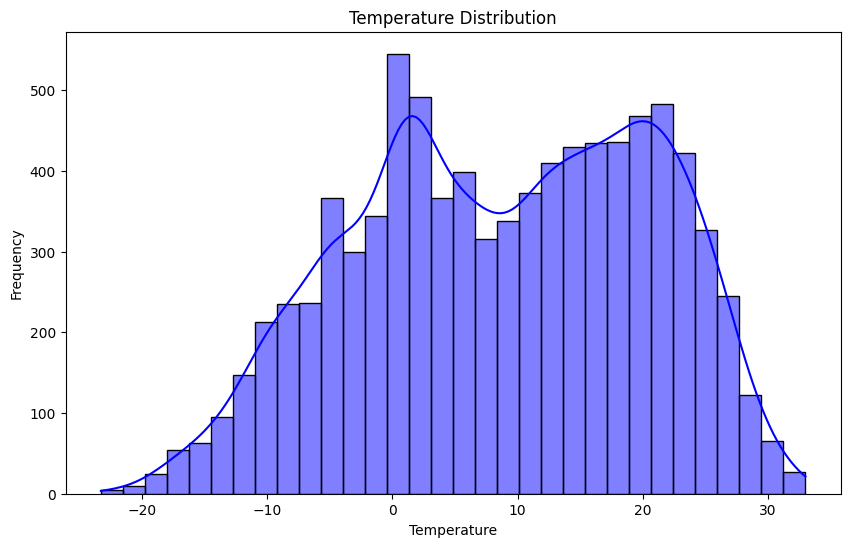

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp_C'], kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Humidity Distribution

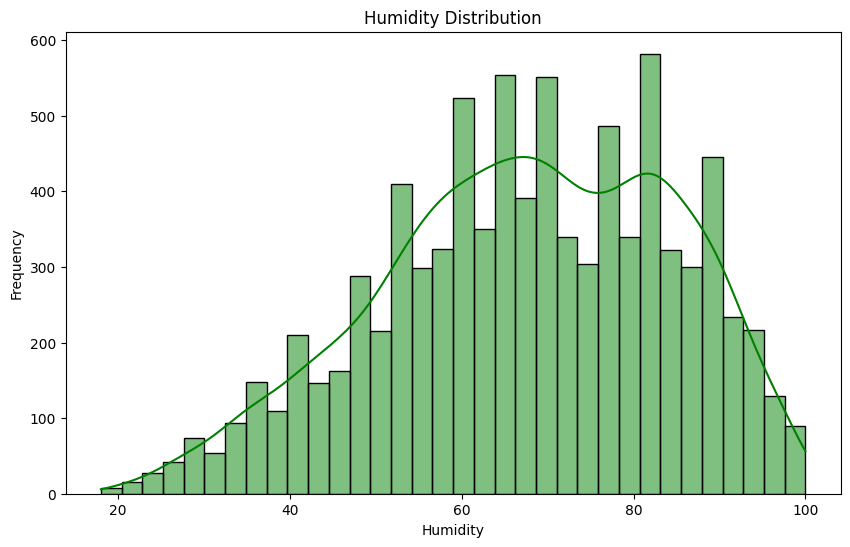

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rel Hum_%'], kde=True, color='green')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

Wind Speed Distribution

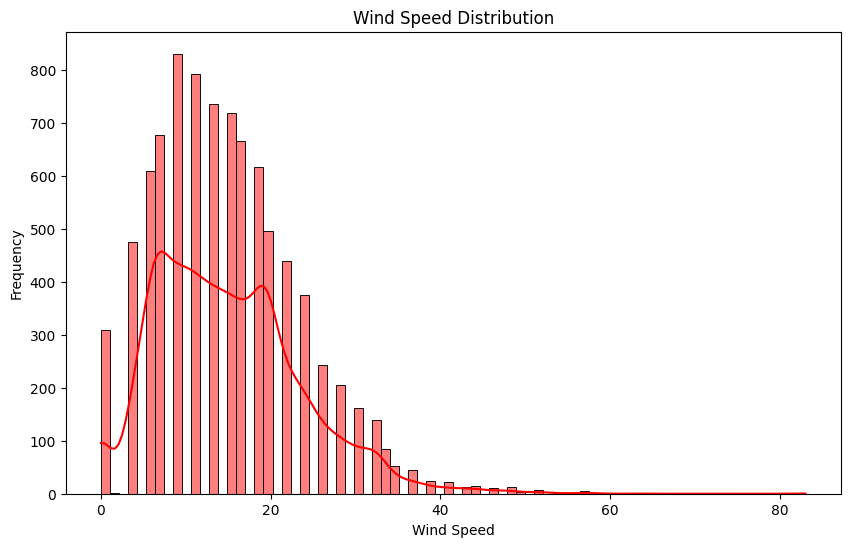

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(df['Wind Speed_km/h'], kde=True, color='red')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

Dew Point Distribution

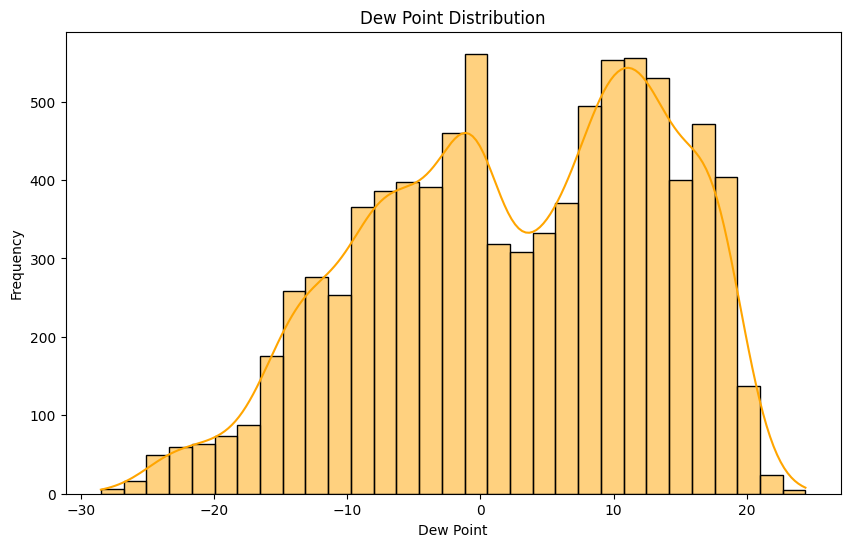

In [146]:
plt.figure(figsize=(10,6))
sns.histplot(df['Dew Point'], kde=True, color='orange')
plt.title('Dew Point Distribution')
plt.xlabel('Dew Point')
plt.ylabel('Frequency')
plt.show()

Plotting time series graphs to visualize trends over time

Temperature over Time

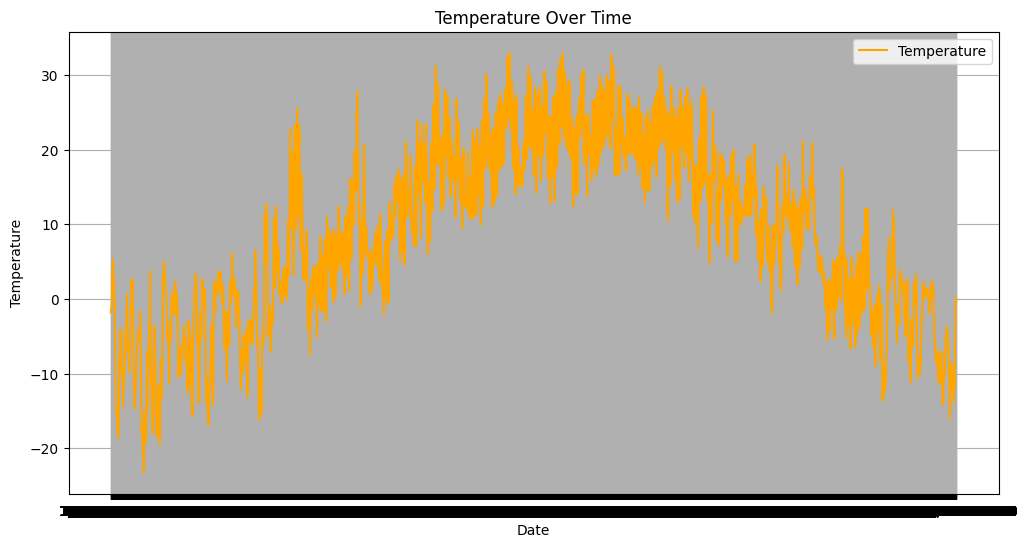

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time'], df['Temp_C'], color='orange', label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

Similarly we would like to show how temperature varied across the different months of the year.

1. Convert the "Date/Time" Column to a Datetime Object

In [132]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

2. Extract Month

In [133]:
df['Month'] = df['Date/Time'].dt.month

# Group by Month and calculate the mean temp for each month
monthly_mean_temp = df.groupby('Month')['Temp_C'].mean().reset_index()

In [134]:
monthly_mean_temp.head()

,Month,Temp_C
0,1,-7.371505
1,2,-4.225000
2,3,3.121237
3,4,7.009306
4,5,16.237769


3. Plotting

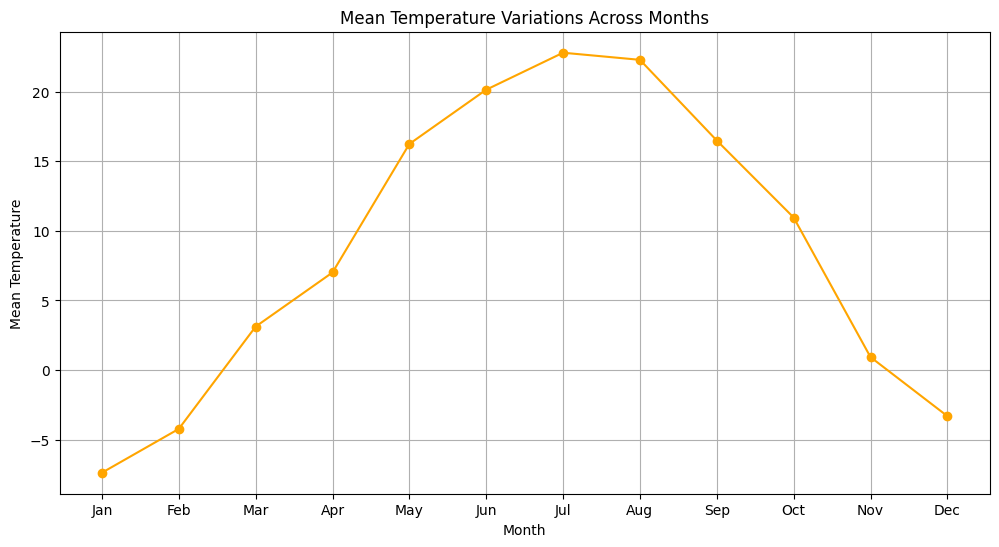

In [135]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_mean_temp['Month'], monthly_mean_temp['Temp_C'], marker='o', color='orange')

plt.title('Mean Temperature Variations Across Months')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

We can additionally do the same analysis for Pressure KPa recorded over the different months

In [136]:
monthly_mean_press = df.groupby('Month')['Press_kPa'].mean().reset_index()

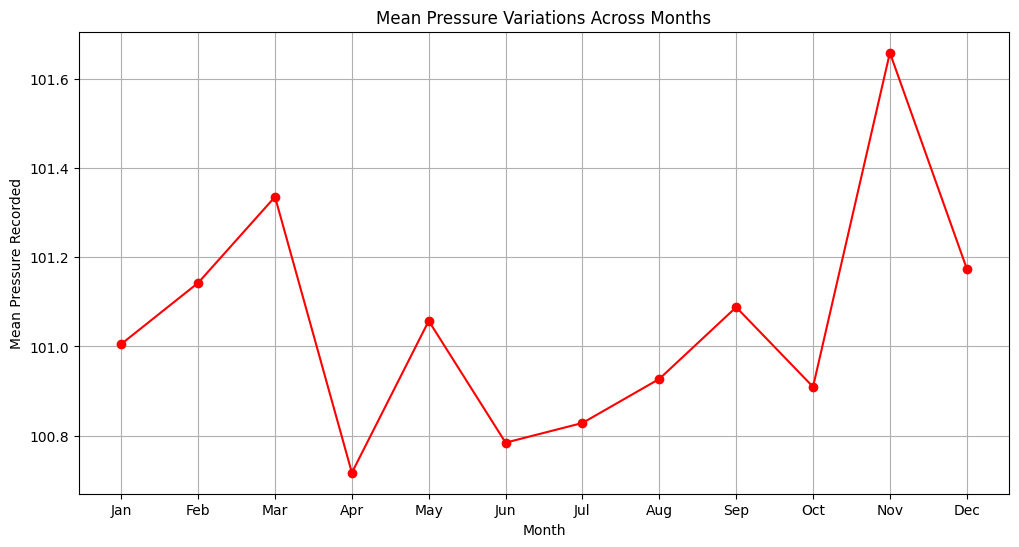

In [137]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_mean_press['Month'], monthly_mean_press['Press_kPa'], marker='o', color='red')

plt.title('Mean Pressure Variations Across Months')
plt.xlabel('Month')
plt.ylabel('Mean Pressure Recorded')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Wind_Speeds variations over months

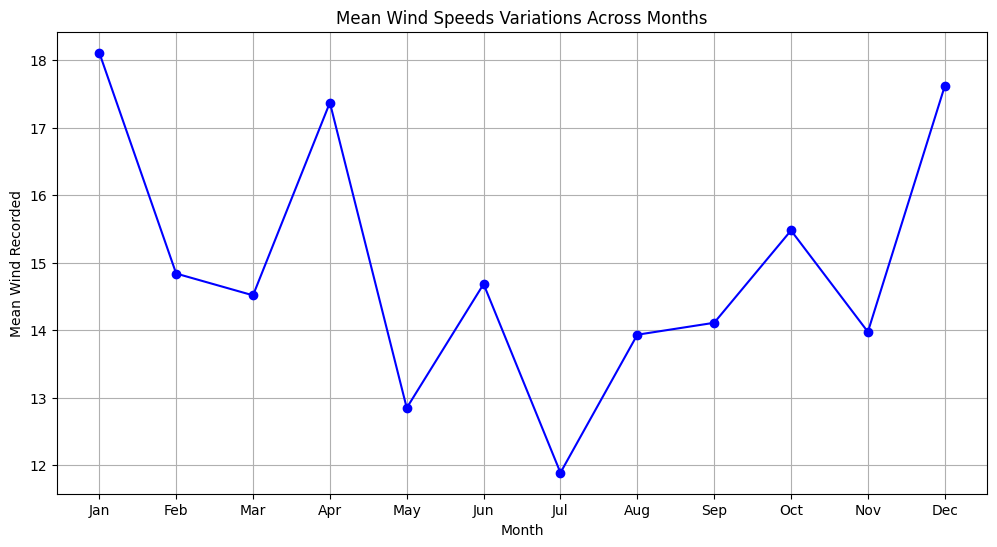

In [154]:
monthly_mean_wind= df.groupby('Month')['Wind Speed_km/h'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(monthly_mean_wind['Month'], monthly_mean_wind['Wind Speed_km/h'], marker='o', color='blue')

plt.title('Mean Wind Speeds Variations Across Months')
plt.xlabel('Month')
plt.ylabel('Mean Wind Recorded')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


I want also to show the same for Temperature, Wind Speeds,  Relative Humidity and Visibity_km columns but in one graph plot visualization


In [157]:
# Group by Month and calculate the mean for each parameter
monthly_hum_vis_mean = df.groupby('Month')[['Temp_C', 'Wind Speed_km/h','Rel Hum_%', 'Visibility_km']].mean().reset_index()

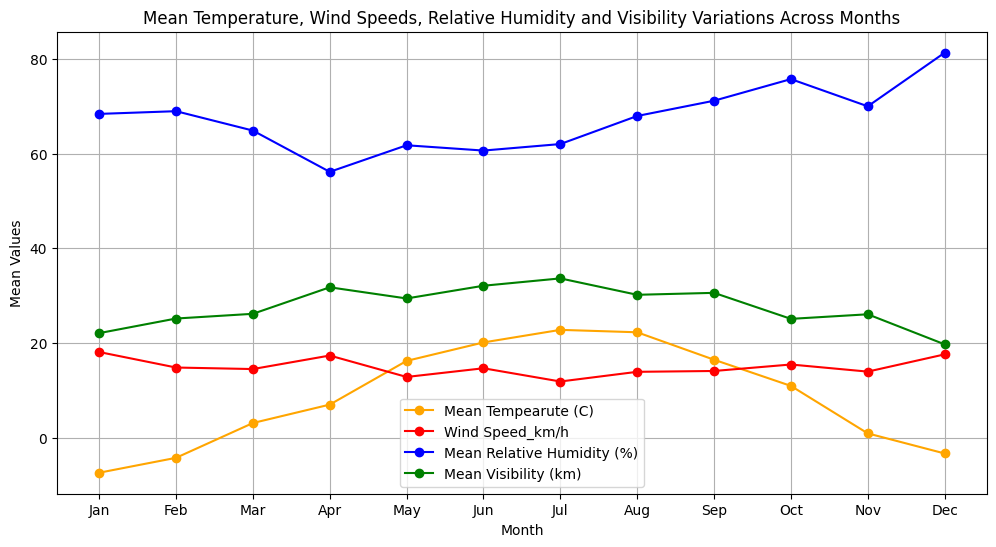

In [160]:
plt.figure(figsize=(12, 6))
# Plotting mean temp, speeds, hum and vis variations across months
plt.plot(monthly_hum_vis_mean['Month'], monthly_hum_vis_mean['Temp_C'], marker='o', color='orange', label='Mean Tempearute (C)')

plt.plot(monthly_hum_vis_mean['Month'], monthly_hum_vis_mean['Wind Speed_km/h'], marker='o', color='red', label='Wind Speed_km/h')

plt.plot(monthly_hum_vis_mean['Month'], monthly_hum_vis_mean['Rel Hum_%'], marker='o', color='blue', label='Mean Relative Humidity (%)')

plt.plot(monthly_hum_vis_mean['Month'], monthly_hum_vis_mean['Visibility_km'], marker='o', color='green', label='Mean Visibility (km)')

plt.title('Mean Temperature, Wind Speeds, Relative Humidity and Visibility Variations Across Months')
plt.xlabel('Month')
plt.ylabel('Mean Values')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# **Correlation Matrices and Heatmaps between different weather parameters**

**1. Correlation matrices**

We will start of by displaying the correlation heatmap of the different numerical weather patterns in the dataset to get an overview

In [140]:
# Select only numerical columns for correlation analysis
weather_num_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = weather_num_df.corr()

correlation_matrix

,Temp_C,Dew Point,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


Taking all variables into account, we can now create a heat map that
indicates the correlation between each of the variables with one another.

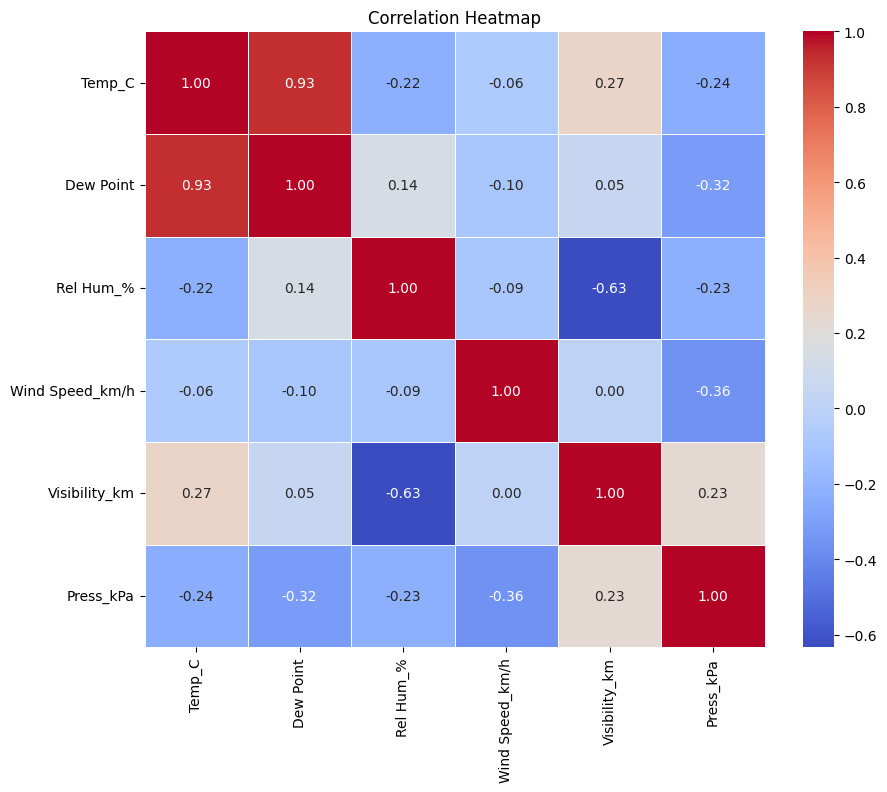

In [141]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Let's look at the correlation between Temperature and Dew Point. We will visualize these two variables using a scatter plot and an added linear line called a regression line, which indicates the relationship between the two. The main goal of this plot is to see whether temperature has any impact on the on the dew point.

<Axes: xlabel='Temp_C', ylabel='Dew Point'>

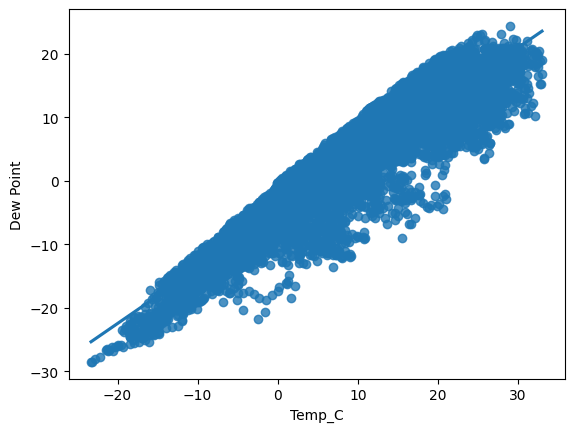

In [142]:
sns.regplot(x = "Temp_C", y = "Dew Point", data = df)

In this example, you can see that the straight line through the data points is very steep, which shows that there is a positive linear relationship between the two variables.

With increase in temperature, dew points go up as well, and the slope of the line is positive. So there is a positive correlation between temp and dew point.

Another example can the correlation between Visibility and Relative Humidity.

(0.0, 104.1)

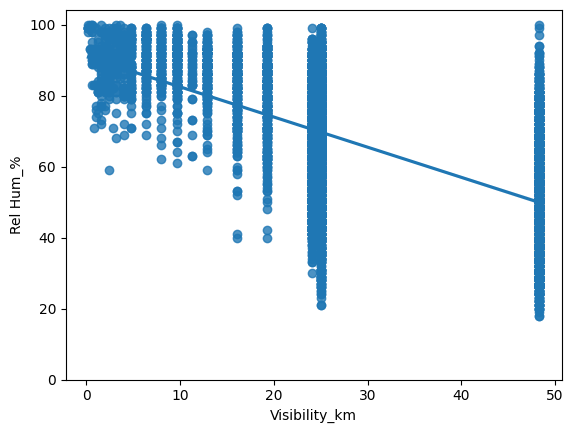

In [153]:
sns.regplot(x= 'Visibility_km',y='Rel Hum_%', data=df)
plt.ylim(0)

The above is an example of a strong negative correlation, between visibility and humidity(-0.63), Meaning that as road visibility increases, the relative humidity of air decreases and vice versa.

Visibility_km Vs Dew Point

<Axes: xlabel='Visibility_km', ylabel='Dew Point'>

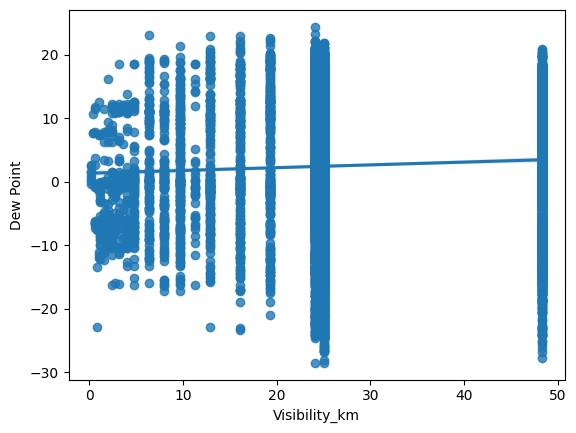

In [144]:
sns.regplot(x='Visibility_km', y='Dew Point', data=df)

0.05 Correlation coeffiecient, meaning close to no correation at all.(very very weak )

Road Visibility Vs Temperature Variations

<Axes: xlabel='Visibility_km', ylabel='Temp_C'>

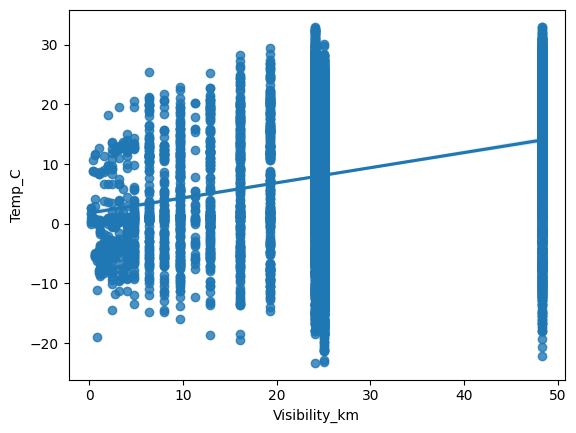

In [149]:
sns.regplot(x='Visibility_km',y='Temp_C',  data=df)

(0.27)Weak positive correlation coefficient.

**Unusual patterns in the data**

Of all the columns, Visibility_km recorded the highest number of ouliers(3507) which was alomost half the whole recorded values. Other than that, the dataset was very okay.
Data Cleaning should be enforced on this column to stablize the dataset.

# **Insights and Conclusions:**

---



Based on your Exploratory Data Analysis (EDA) of the weather dataset, here are some key insights and conclusions you might consider:

1. **Temperature Variations Across Months**

Insight: The analysis showed clear seasonal trends in temperature, with higher mean temperatures during the summer months and lower temperatures during winter. This suggests a typical seasonal cycle in the region represented by the dataset.

Practical Application: Understanding seasonal temperature variations is crucial for weather forecasting, agricultural planning, and energy consumption prediction. Accurate seasonal temperature trends can help in predicting heatwaves or cold spells.
2. **Relative Humidity Trends**

Insight: The relative humidity also exhibited seasonal patterns, often inversely correlated with temperature. For instance, higher temperatures during summer were associated with lower humidity levels.

Practical Application: Relative humidity is a key factor in weather prediction, particularly in forecasting precipitation, fog, and dew. These insights can aid in agricultural decision-making, such as irrigation scheduling, and help in health-related planning to mitigate the effects of high or low humidity on populations.
3. **Visibility Variations**

Insight: The visibility data showed fluctuations across the year, possibly due to factors like fog, precipitation, or pollution. Lower visibility was often observed during colder months, which may coincide with increased fog or mist.

Practical Application: Visibility is crucial for aviation, maritime operations, and road safety. Understanding when and why visibility drops can improve the safety and efficiency of transport systems. For example, predicting foggy conditions can help in issuing warnings to drivers and pilots.
4. **Correlation Between Weather Parameters**

Insight: The correlation matrix revealed significant relationships between different weather parameters. For example, temperature and relative humidity were negatively correlated, while visibility was moderately correlated with both temperature and humidity.

Practical Application: These correlations can be used to improve weather models. For instance, by understanding how temperature impacts humidity, models can be adjusted to predict conditions like heatwaves or droughts more accurately. Furthermore, these correlations can help in developing better predictive models for air quality, as visibility is often a proxy for pollution levels.
5. **Outliers in the Data**

Insight: Outliers were detected in humidity, and visibility, indicating extreme weather conditions such as unusually high temperatures or very low visibility due to dense fog.


Practical Application: Identifying and understanding outliers is important for improving weather prediction models and preparing for extreme weather events. These insights can help in disaster preparedness and response, such as issuing heatwave alerts or preparing for fog-related travel disruptions.

**Conclusions**

* Seasonal Cycles: The dataset clearly reflects seasonal cycles, which are key to understanding and predicting weather patterns. These cycles impact everything from daily life to broader economic activities, such as agriculture and energy consumption.

* Correlation Between Parameters: The interrelationship between temperature, humidity, and visibility can be leveraged to improve weather forecasting models, providing more accurate and reliable predictions.

* Practical Implications: The insights gained from this analysis can inform a variety of practical applications, from improving weather prediction models to aiding in agricultural planning, ensuring public safety during extreme weather conditions, and optimizing transport and logistics operations.

### **Recommendations for Further Analysis:**

1. **Incorporate Additional Weather Parameters**

Precipitation Data: Including precipitation data (rainfall, snow, etc.) could provide insights into how weather conditions like humidity and temperature impact precipitation levels. It could also help in understanding the relationship between precipitation and visibility.

2. **Consider Geographic Analysis**

Regional Clustering: Perform clustering analysis to group similar weather patterns by region, which could help in understanding localized climate zones and tailoring predictions for specific areas.

3. **Cross-Disciplinary Analysis**

* Agricultural Impact: Explore the impact of weather conditions on agricultural productivity. By integrating crop yield data, you could assess how temperature, humidity, and precipitation affect farming outcomes.
* Public Health Analysis: Examine the relationship between weather conditions and public health outcomes, such as heat-related illnesses or respiratory issues due to high humidity or pollution.